In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme(style="whitegrid")
%matplotlib inline

C:\Users\Eroza\AppData\Local\Temp\ipykernel_4280\4268287673.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#cargar los datos

datos = "../datos/raw/hotel_bookings.csv"

df = pd.read_csv(datos)

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
#Dimension del dataset, se hace para saber que tan grande es un archivo que estamos manegando
print("dimension: ", df.shape)
#informacion general y tipos de datos
df.info()
#estadistica descriptivas
print(df.describe())

#valores faltantes por columna
df.isnull().sum()

dimension:  (119390, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int6

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

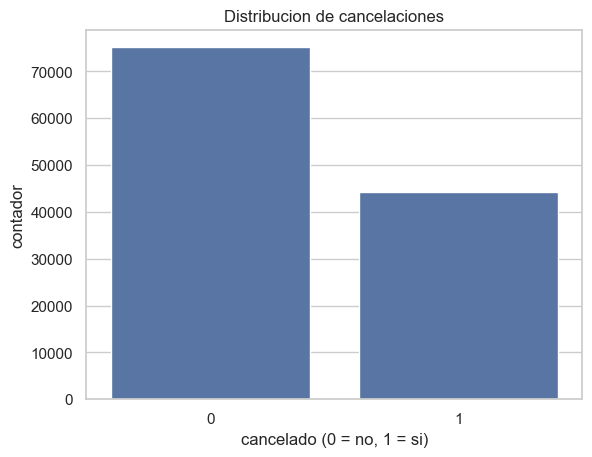

In [5]:
#conteo de cancelaciones vs no cancelaciones

sns.countplot(x='is_canceled', data=df)
plt.title('Distribucion de cancelaciones')
plt.xlabel('cancelado (0 = no, 1 = si)')
plt.ylabel('contador')
plt.show()

In [ ]:
# Mapear meses a números
months_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['arrival_date_month'] = df['arrival_date_month'].map(months_map)

# Crear la fecha combinada usando un dict con year, month y day
df['arrival_date'] = pd.to_datetime(dict(
    year = df['arrival_date_year'],
    month = df['arrival_date_month'],
    day = df['arrival_date_day_of_month']
))

# Extraer features calendáricas
df['arrival_year']= df['arrival_date'].dt.year
df['arrival_month']= df['arrival_date'].dt.month
df['arrival_dayofweek'] = df['arrival_date'].dt.dayofweek


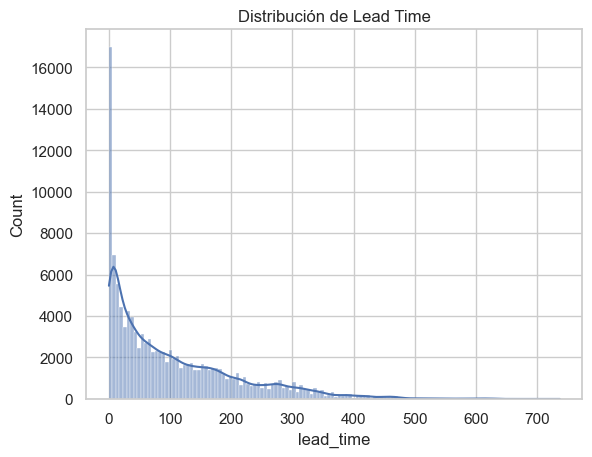

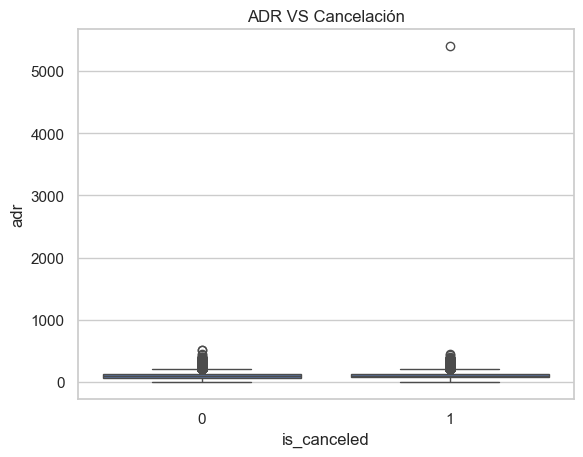

In [7]:
sns.histplot(df['lead_time'], kde=True)
plt.title('Distribución de Lead Time')
plt.show()

sns.boxplot(x='is_canceled', y='adr', data=df)
plt.title('ADR VS Cancelación')
plt.show()

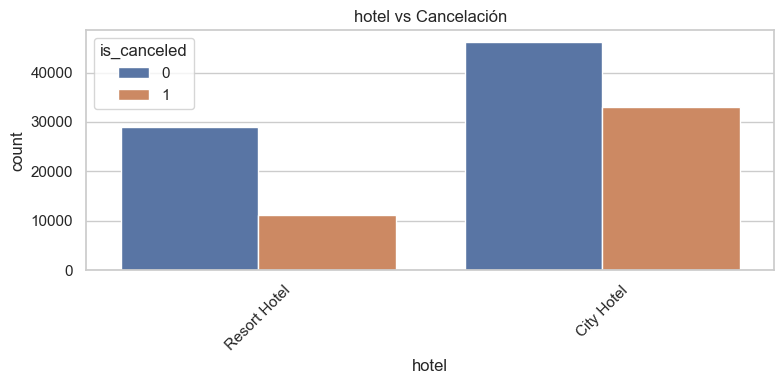

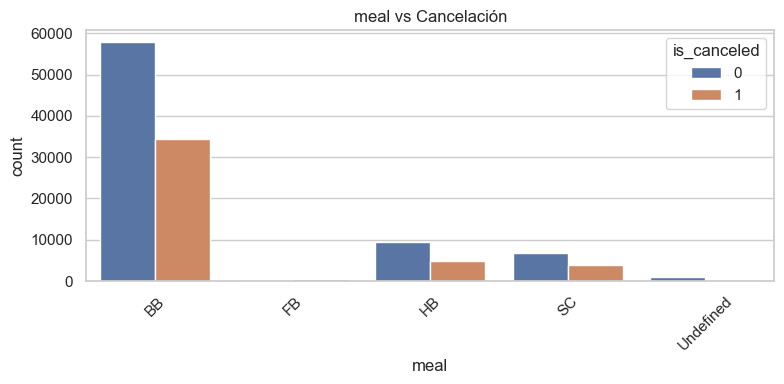

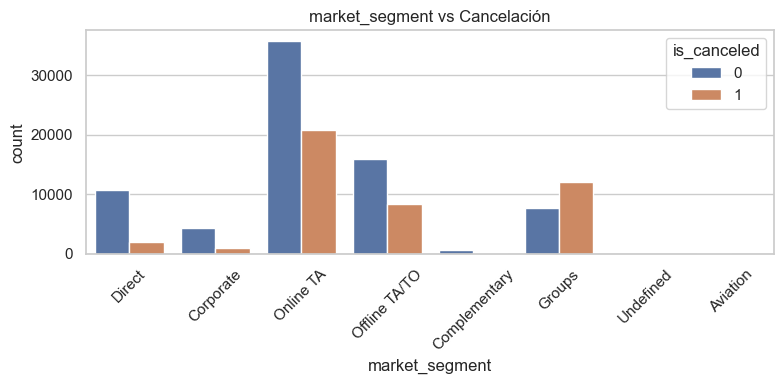

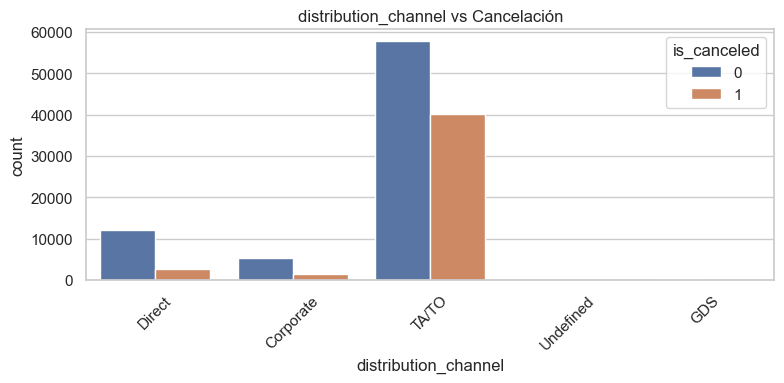

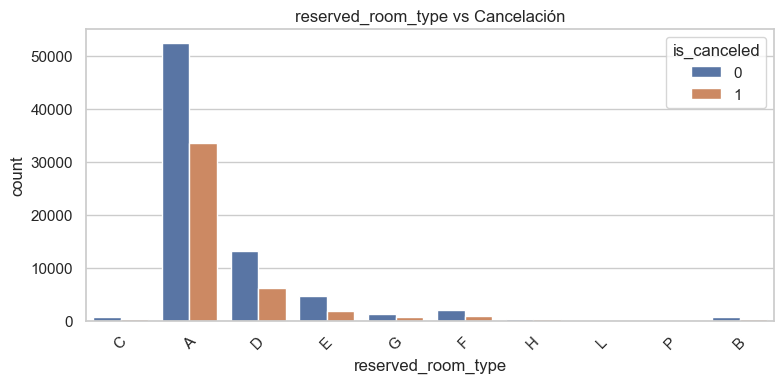

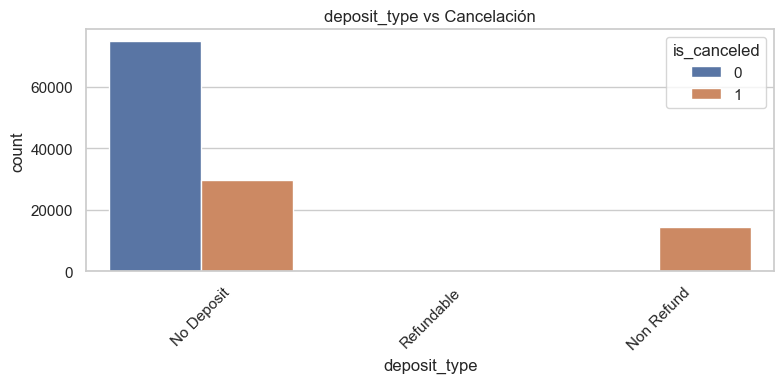

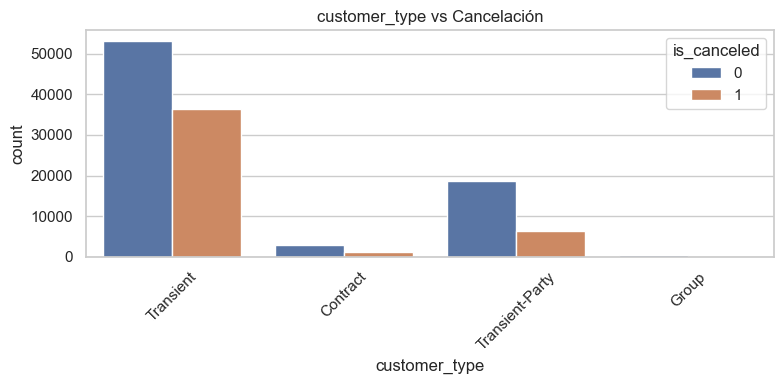

In [8]:
categorical_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel',
                    'reserved_room_type', 'deposit_type', 'customer_type']
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='is_canceled', data=df)
    plt.title(f'{col} vs Cancelación')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

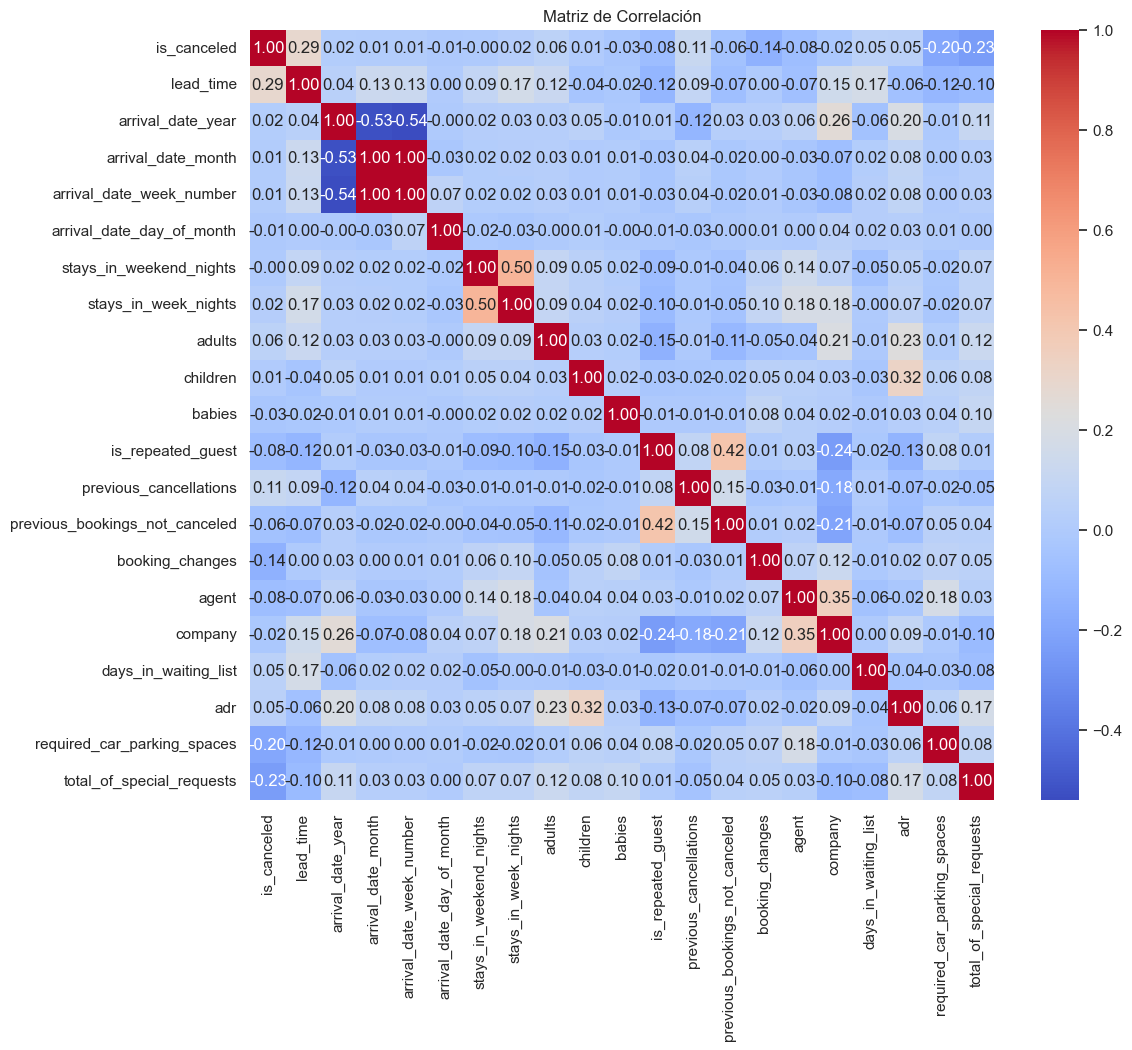

In [9]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()